In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# EDA for passing yards, visualizations and additional wrangling:

In [157]:
qb_data = pd.read_csv('passing_data_cleaned.csv')

Taking a look at the data we will be looking at by using .head() 

In [158]:
qb_data.head()

passer_player_name posteam defteam  season  week home_team away_team  \
0           J.Garcia      SF     ATL    2001     1        SF       ATL   
1           J.Garcia      SF     ATL    2001     1        SF       ATL   
2           J.Garcia      SF     ATL    2001     1        SF       ATL   
3           J.Garcia      SF     ATL    2001     1        SF       ATL   
4         C.Chandler     ATL      SF    2001     1        SF       ATL   

  play_type  air_yards  yards_after_catch  ...  complete_pass  \
0      pass        NaN                NaN  ...            1.0   
1      pass        NaN                NaN  ...            1.0   
2      pass        NaN                NaN  ...            0.0   
3      pass        NaN                NaN  ...            0.0   
4      pass        NaN                NaN  ...            0.0   

   incomplete_pass  interception  qb_hit  sack  pass_touchdown  passing_yards  \
0              0.0           0.0     0.0   0.0             0.0            6.0   
1              0.0           0.0     0.0   0.0             0.0           26.0   
2              1.0           0.0     0.0   0.0             0.0            NaN   
3              0.0           0.0     1.0   1.0             0.0            NaN   
4              0.0           0.0     1.0   1.0             0.0            NaN   

   cpoe      roof surface  
0   NaN  outdoors   grass  
1   NaN  outdoors   grass  
2   NaN  outdoors   grass  
3   NaN  outdoors   grass  
4   NaN  outdoors   grass  

[5 rows x 21 columns]

The data types for this dataframe:

In [163]:
qb_data.dtypes

passer_player_name     object
posteam                object
defteam                object
season                  int64
week                    int64
home_team              object
away_team              object
play_type              object
air_yards             float64
yards_after_catch     float64
epa                   float64
complete_pass         float64
incomplete_pass       float64
interception          float64
qb_hit                float64
sack                  float64
pass_touchdown        float64
passing_yards         float64
cpoe                  float64
roof                   object
surface                object
dtype: object

Exploring the dataframe by looking at some players and their highest passing yards and touchdowns:

Tom Brady

Patrick Mahomes

Jalen Hurts

In [165]:
#Tom Brady
qb_data[qb_data['passer_player_name'] == 'T.Brady']

passer_player_name posteam defteam  season  week home_team away_team  \
1608              T.Brady      NE     NYJ    2001     2        NE       NYJ   
1609              T.Brady      NE     NYJ    2001     2        NE       NYJ   
1610              T.Brady      NE     NYJ    2001     2        NE       NYJ   
1611              T.Brady      NE     NYJ    2001     2        NE       NYJ   
1612              T.Brady      NE     NYJ    2001     2        NE       NYJ   
...                   ...     ...     ...     ...   ...       ...       ...   
426094            T.Brady      TB     DAL    2022    19        TB       DAL   
426095            T.Brady      TB     DAL    2022    19        TB       DAL   
426096            T.Brady      TB     DAL    2022    19        TB       DAL   
426097            T.Brady      TB     DAL    2022    19        TB       DAL   
426098            T.Brady      TB     DAL    2022    19        TB       DAL   

       play_type  air_yards  yards_after_catch  ...  complete_pass  \
1608        pass        NaN                NaN  ...            1.0   
1609        pass        NaN                NaN  ...            1.0   
1610        pass        NaN                NaN  ...            0.0   
1611        pass        NaN                NaN  ...            1.0   
1612        pass        NaN                NaN  ...            1.0   
...          ...        ...                ...  ...            ...   
426094      pass        5.0                7.0  ...            1.0   
426095      pass       19.0                NaN  ...            0.0   
426096      pass        NaN                NaN  ...            0.0   
426097      pass        3.0                9.0  ...            1.0   
426098      pass       15.0                NaN  ...            0.0   

        incomplete_pass  interception  qb_hit  sack  pass_touchdown  \
1608                0.0           0.0     0.0   0.0             0.0   
1609                0.0           0.0     0.0   0.0             0.0   
1610                1.0           0.0     0.0   0.0             0.0   
1611                0.0           0.0     0.0   0.0             0.0   
1612                0.0           0.0     0.0   0.0             0.0   
...                 ...           ...     ...   ...             ...   
426094              0.0           0.0     0.0   0.0             0.0   
426095              1.0           0.0     0.0   0.0             0.0   
426096              0.0           0.0     1.0   1.0             0.0   
426097              0.0           0.0     0.0   0.0             0.0   
426098              1.0           0.0     0.0   0.0             0.0   

        passing_yards       cpoe      roof surface  
1608              4.0        NaN  outdoors   grass  
1609              9.0        NaN  outdoors   grass  
1610              NaN        NaN  outdoors   grass  
1611              9.0        NaN  outdoors   grass  
1612              3.0        NaN  outdoors   grass  
...               ...        ...       ...     ...  
426094           12.0  23.620945  outdoors   grass  
426095            NaN -65.693760  outdoors   grass  
426096            NaN        NaN  outdoors   grass  
426097           12.0  19.122797  outdoors   grass  
426098            NaN -58.646973  outdoors   grass  

[14615 rows x 21 columns]

In [174]:
#Checking some data on famous quarterbacks: Patrick Mahomes
qb_data[qb_data['passer_player_name'] == 'P.Mahomes']

passer_player_name posteam defteam  season  week home_team away_team  \
324260          P.Mahomes      KC     DEN    2017    17       DEN        KC   
324261          P.Mahomes      KC     DEN    2017    17       DEN        KC   
324262          P.Mahomes      KC     DEN    2017    17       DEN        KC   
324263          P.Mahomes      KC     DEN    2017    17       DEN        KC   
324265          P.Mahomes      KC     DEN    2017    17       DEN        KC   
...                   ...     ...     ...     ...   ...       ...       ...   
426917          P.Mahomes      KC     PHI    2022    22       PHI        KC   
426918          P.Mahomes      KC     PHI    2022    22       PHI        KC   
426923          P.Mahomes      KC     PHI    2022    22       PHI        KC   
426924          P.Mahomes      KC     PHI    2022    22       PHI        KC   
426925          P.Mahomes      KC     PHI    2022    22       PHI        KC   

       play_type  air_yards  yards_after_catch  ...  complete_pass  \
324260      pass       11.0                NaN  ...            0.0   
324261      pass       13.0                NaN  ...            0.0   
324262      pass       26.0               25.0  ...            1.0   
324263      pass        2.0                NaN  ...            0.0   
324265      pass       -4.0                7.0  ...            1.0   
...          ...        ...                ...  ...            ...   
426917      pass        4.0                NaN  ...            0.0   
426918      pass        0.0                4.0  ...            1.0   
426923      pass        6.0                4.0  ...            1.0   
426924      pass        4.0                3.0  ...            1.0   
426925      pass       -5.0                5.0  ...            1.0   

        incomplete_pass  interception  qb_hit  sack  pass_touchdown  \
324260              1.0           0.0     1.0   0.0             0.0   
324261              1.0           0.0     0.0   0.0             0.0   
324262              0.0           0.0     0.0   0.0             0.0   
324263              1.0           0.0     1.0   0.0             0.0   
324265              0.0           0.0     0.0   0.0             0.0   
...                 ...           ...     ...   ...             ...   
426917              1.0           0.0     0.0   0.0             0.0   
426918              0.0           0.0     0.0   0.0             1.0   
426923              0.0           0.0     0.0   0.0             0.0   
426924              0.0           0.0     0.0   0.0             0.0   
426925              0.0           0.0     0.0   0.0             0.0   

        passing_yards       cpoe      roof surface  
324260            NaN -42.439780  outdoors   grass  
324261            NaN -69.327810  outdoors   grass  
324262           51.0  60.581860  outdoors   grass  
324263            NaN -52.201140  outdoors   grass  
324265            3.0  14.104235  outdoors   grass  
...               ...        ...       ...     ...  
426917            NaN        NaN    closed   grass  
426918            4.0  34.123890    closed   grass  
426923           10.0  22.894585    closed   grass  
426924            7.0  20.355404    closed   grass  
426925            0.0  13.164168    closed   grass  

[3673 rows x 21 columns]

In [175]:
#Checking some data on my favorite players: Jalen Hurts
qb_data[qb_data['passer_player_name'] == 'J.Hurts']

passer_player_name posteam defteam  season  week home_team away_team  \
371073            J.Hurts     PHI     PIT    2020     5       PIT       PHI   
372929            J.Hurts     PHI     NYG    2020     7       PHI       NYG   
373350            J.Hurts     PHI     DAL    2020     8       PHI       DAL   
378278            J.Hurts     PHI     SEA    2020    12       PHI       SEA   
379608            J.Hurts     PHI      GB    2020    13        GB       PHI   
...                   ...     ...     ...     ...   ...       ...       ...   
426919            J.Hurts     PHI      KC    2022    22       PHI        KC   
426920            J.Hurts     PHI      KC    2022    22       PHI        KC   
426921            J.Hurts     PHI      KC    2022    22       PHI        KC   
426922            J.Hurts     PHI      KC    2022    22       PHI        KC   
426926            J.Hurts     PHI      KC    2022    22       PHI        KC   

       play_type  air_yards  yards_after_catch  ...  complete_pass  \
371073      pass       13.0                5.0  ...            1.0   
372929      pass        NaN                NaN  ...            0.0   
373350      pass        6.0                3.0  ...            1.0   
378278      pass        6.0                0.0  ...            1.0   
379608      pass       31.0                3.0  ...            1.0   
...          ...        ...                ...  ...            ...   
426919      pass        NaN                NaN  ...            0.0   
426920      pass        3.0                4.0  ...            1.0   
426921      pass        4.0                7.0  ...            1.0   
426922      pass       41.0                4.0  ...            1.0   
426926      pass       45.0                NaN  ...            0.0   

        incomplete_pass  interception  qb_hit  sack  pass_touchdown  \
371073              0.0           0.0     0.0   0.0             0.0   
372929              0.0           0.0     0.0   0.0             0.0   
373350              0.0           0.0     0.0   0.0             0.0   
378278              0.0           0.0     0.0   0.0             0.0   
379608              0.0           0.0     1.0   0.0             0.0   
...                 ...           ...     ...   ...             ...   
426919              0.0           0.0     0.0   1.0             0.0   
426920              0.0           0.0     0.0   0.0             0.0   
426921              0.0           0.0     0.0   0.0             0.0   
426922              0.0           0.0     0.0   0.0             0.0   
426926              1.0           0.0     0.0   0.0             0.0   

        passing_yards       cpoe      roof surface  
371073           18.0  28.971321  outdoors   grass  
372929            NaN        NaN  outdoors   grass  
373350            9.0  24.154902  outdoors   grass  
378278            6.0  23.885983  outdoors   grass  
379608           34.0  71.767990  outdoors   grass  
...               ...        ...       ...     ...  
426919            NaN        NaN    closed   grass  
426920            7.0  18.974846    closed   grass  
426921           11.0  29.595613    closed   grass  
426922           45.0  68.481820    closed   grass  
426926            NaN        NaN    closed   grass  

[1256 rows x 21 columns]

In [176]:
#Checking some data on my favorite players: Tua Tagovailoa
qb_data[qb_data['passer_player_name'] == 'T.Tagovailoa'] 

passer_player_name posteam defteam  season  week home_team away_team  \
372124       T.Tagovailoa     MIA     NYJ    2020     6       MIA       NYJ   
372125       T.Tagovailoa     MIA     NYJ    2020     6       MIA       NYJ   
373468       T.Tagovailoa     MIA      LA    2020     8       MIA        LA   
373469       T.Tagovailoa     MIA      LA    2020     8       MIA        LA   
373470       T.Tagovailoa     MIA      LA    2020     8       MIA        LA   
...                   ...     ...     ...     ...   ...       ...       ...   
423086       T.Tagovailoa     MIA      GB    2022    16       MIA        GB   
423087       T.Tagovailoa     MIA      GB    2022    16       MIA        GB   
423088       T.Tagovailoa     MIA      GB    2022    16       MIA        GB   
423091       T.Tagovailoa     MIA      GB    2022    16       MIA        GB   
423092       T.Tagovailoa     MIA      GB    2022    16       MIA        GB   

       play_type  air_yards  yards_after_catch  ...  complete_pass  \
372124      pass        2.0                0.0  ...            1.0   
372125      pass        7.0                0.0  ...            1.0   
373468      pass        NaN                NaN  ...            0.0   
373469      pass        7.0                1.0  ...            1.0   
373470      pass       35.0                NaN  ...            0.0   
...          ...        ...                ...  ...            ...   
423086      pass       12.0                NaN  ...            0.0   
423087      pass       16.0                3.0  ...            1.0   
423088      pass        8.0                NaN  ...            0.0   
423091      pass        3.0                0.0  ...            1.0   
423092      pass       13.0                NaN  ...            0.0   

        incomplete_pass  interception  qb_hit  sack  pass_touchdown  \
372124              0.0           0.0     0.0   0.0             0.0   
372125              0.0           0.0     0.0   0.0             0.0   
373468              0.0           0.0     1.0   1.0             0.0   
373469              0.0           0.0     0.0   0.0             0.0   
373470              1.0           0.0     0.0   0.0             0.0   
...                 ...           ...     ...   ...             ...   
423086              1.0           0.0     0.0   0.0             0.0   
423087              0.0           0.0     0.0   0.0             0.0   
423088              0.0           1.0     0.0   0.0             0.0   
423091              0.0           0.0     0.0   0.0             0.0   
423092              0.0           1.0     0.0   0.0             0.0   

        passing_yards       cpoe      roof surface  
372124            2.0  19.446540  outdoors   grass  
372125            7.0  40.597850  outdoors   grass  
373468            NaN        NaN  outdoors   grass  
373469            8.0  30.076223  outdoors   grass  
373470            NaN -30.136362  outdoors   grass  
...               ...        ...       ...     ...  
423086            NaN -72.058320  outdoors   grass  
423087           19.0  32.702300  outdoors   grass  
423088            NaN -69.212610  outdoors   grass  
423091            3.0  21.112991  outdoors   grass  
423092            NaN -63.080727  outdoors   grass  

[1140 rows x 21 columns]

Checking out some specific Numbers:
Player with most passing yards in a single match

In [178]:
#Player with the most passing yards in a single match
most_passing_yards_index = qb_data['passing_yards'].idxmax()

most_passing_yards_player = qb_data.loc[most_passing_yards_index, 'passer_player_name']
most_passing_yards_count = qb_data.loc[most_passing_yards_index, 'passing_yards']

print(f"The player with the most passing yards in a single game is : {most_passing_yards_player}, with a count of {most_passing_yards_count} yards")

The player with the most passing yards in a single game is : T. Green, with a count of 99.0 yards


In [281]:
qb_data.describe()

season           week      air_yards  yards_after_catch  \
count  426927.000000  426927.000000  312089.000000      195311.000000   
mean     2011.735775       9.525924       8.308630           5.120669   
std         6.343054       5.320519      10.110564           6.991602   
min      2001.000000       1.000000     -93.000000         -72.000000   
25%      2006.000000       5.000000       2.000000           1.000000   
50%      2012.000000      10.000000       6.000000           3.000000   
75%      2017.000000      14.000000      13.000000           7.000000   
max      2022.000000      22.000000      78.000000          91.000000   

                 epa  complete_pass  incomplete_pass   interception  \
count  426925.000000  426927.000000    426927.000000  426927.000000   
mean        0.013974       0.578085         0.329693       0.025677   
std         1.602734       0.493866         0.470102       0.158169   
min       -13.031219       0.000000         0.000000       0.000000   
25%        -0.755814       0.000000         0.000000       0.000000   
50%        -0.229100       1.000000         0.000000       0.000000   
75%         0.923395       1.000000         1.000000       0.000000   
max         8.928134       1.000000         1.000000       1.000000   

              qb_hit           sack  pass_touchdown  passing_yards  \
count  426927.000000  426927.000000   426927.000000  246799.000000   
mean        0.114668       0.063350        0.040290      11.408089   
std         0.318622       0.243592        0.196639      10.128975   
min         0.000000       0.000000        0.000000     -22.000000   
25%         0.000000       0.000000        0.000000       5.000000   
50%         0.000000       0.000000        0.000000       9.000000   
75%         0.000000       0.000000        0.000000      15.000000   
max         1.000000       1.000000        1.000000      99.000000   

                cpoe  pass_attempts  pass_completion  
count  305144.000000  426927.000000    387554.000000  
mean        0.050049       0.907778         0.636813  
std        44.843349       0.289347         0.480918  
min       -92.059100       0.000000         0.000000  
25%       -44.135320       1.000000         0.000000  
50%        20.218081       1.000000         1.000000  
75%        31.925383       1.000000         1.000000  
max        85.264440       2.000000         1.000000

In [181]:
#Seeing the yearly average pass completion percentages, but first we create dataframes based on season 
# Listing of years from 2001 to 2022
years = list(range(2001, 2023))

# Dictionary to store DataFrames for each year
yearly_data = {}

# Iterating over the years
for year in years:
    # Filter the data for the current year
    yearly_data[f'season_{year}_data'] = qb_data[qb_data['season'] == year]


In [182]:
#Confirming whether the for loop worked 
yearly_data['season_2001_data'].head()

passer_player_name posteam defteam  season  week home_team away_team  \
0           J.Garcia      SF     ATL    2001     1        SF       ATL   
1           J.Garcia      SF     ATL    2001     1        SF       ATL   
2           J.Garcia      SF     ATL    2001     1        SF       ATL   
3           J.Garcia      SF     ATL    2001     1        SF       ATL   
4         C.Chandler     ATL      SF    2001     1        SF       ATL   

  play_type  air_yards  yards_after_catch  ...  complete_pass  \
0      pass        NaN                NaN  ...            1.0   
1      pass        NaN                NaN  ...            1.0   
2      pass        NaN                NaN  ...            0.0   
3      pass        NaN                NaN  ...            0.0   
4      pass        NaN                NaN  ...            0.0   

   incomplete_pass  interception  qb_hit  sack  pass_touchdown  passing_yards  \
0              0.0           0.0     0.0   0.0             0.0            6.0   
1              0.0           0.0     0.0   0.0             0.0           26.0   
2              1.0           0.0     0.0   0.0             0.0            NaN   
3              0.0           0.0     1.0   1.0             0.0            NaN   
4              0.0           0.0     1.0   1.0             0.0            NaN   

   cpoe      roof surface  
0   NaN  outdoors   grass  
1   NaN  outdoors   grass  
2   NaN  outdoors   grass  
3   NaN  outdoors   grass  
4   NaN  outdoors   grass  

[5 rows x 21 columns]

In [185]:
yearly_data['season_2022_data'].head()

passer_player_name posteam defteam  season  week home_team away_team  \
406534           J.Flacco     NYJ     BAL    2022     1       NYJ       BAL   
406535           J.Flacco     NYJ     BAL    2022     1       NYJ       BAL   
406536          L.Jackson     BAL     NYJ    2022     1       NYJ       BAL   
406537          L.Jackson     BAL     NYJ    2022     1       NYJ       BAL   
406538          L.Jackson     BAL     NYJ    2022     1       NYJ       BAL   

       play_type  air_yards  yards_after_catch  ...  complete_pass  \
406534      pass        0.0                NaN  ...            0.0   
406535      pass        0.0                NaN  ...            0.0   
406536      pass       -4.0                8.0  ...            1.0   
406537      pass        3.0                1.0  ...            1.0   
406538      pass        2.0                6.0  ...            1.0   

        incomplete_pass  interception  qb_hit  sack  pass_touchdown  \
406534              1.0           0.0     0.0   0.0             0.0   
406535              1.0           0.0     1.0   0.0             0.0   
406536              0.0           0.0     0.0   0.0             0.0   
406537              0.0           0.0     0.0   0.0             0.0   
406538              0.0           0.0     0.0   0.0             0.0   

        passing_yards       cpoe      roof    surface  
406534            NaN -74.339850  outdoors  fieldturf  
406535            NaN        NaN  outdoors  fieldturf  
406536            4.0  11.994767  outdoors  fieldturf  
406537            4.0  23.821402  outdoors  fieldturf  
406538            8.0  20.157988  outdoors  fieldturf  

[5 rows x 21 columns]

Pass completion percetages for quarterbacks:

In [64]:
#Creating a for loop to calculate pass completions per season per player
pass_completion_percentages = {}

for year in range(2001, 2023):
    season_data = yearly_data[f'season_{year}_data']
    
    completion_percentage = (season_data.groupby('passer_player_name')['complete_pass'].sum() / 
                             (season_data.groupby('passer_player_name')['complete_pass'].sum() + 
                              season_data.groupby('passer_player_name')['incomplete_pass'].sum()) * 100)
    
    # Remove NaN values and values that are 100%
    completion_percentage = completion_percentage.dropna()
    completion_percentage = completion_percentage[completion_percentage < 100]
    
    pass_completion_percentages[f'pass_completion_percentage_{year}'] = completion_percentage

# Access the results for a specific year, e.g., 2001
pass_completion_percentages['pass_completion_percentage_2001'].head(30)

passer_player_name
A.Brooks        58.208955
A.Feeley        76.923077
A.Smith         62.500000
A.Van Pelt      60.135135
A.Wright        51.612903
B.Favre         64.527629
B.Griese        63.657407
B.Huard         52.941176
B.Johnson       62.413793
B.Moorman        0.000000
B.Volek          0.000000
C.Batch         60.182371
C.Chandler      63.532764
C.Hentrich       0.000000
C.Pennington    50.000000
C.Stoerner      59.090909
C.Weinke        56.238004
D.Bledsoe       58.823529
D.Brees         55.555556
D.Craig         50.000000
D.Culpepper     66.572238
D.Flutie        58.449304
D.Johnson       60.000000
D.McAllister    50.000000
D.McNabb        60.209424
E.Grbac         58.882236
F.Mitchell       0.000000
F.Sanders        0.000000
G.Frerotte      62.500000
H.Ward           0.000000
dtype: float64

Visalizations for pass completion percentages per season:

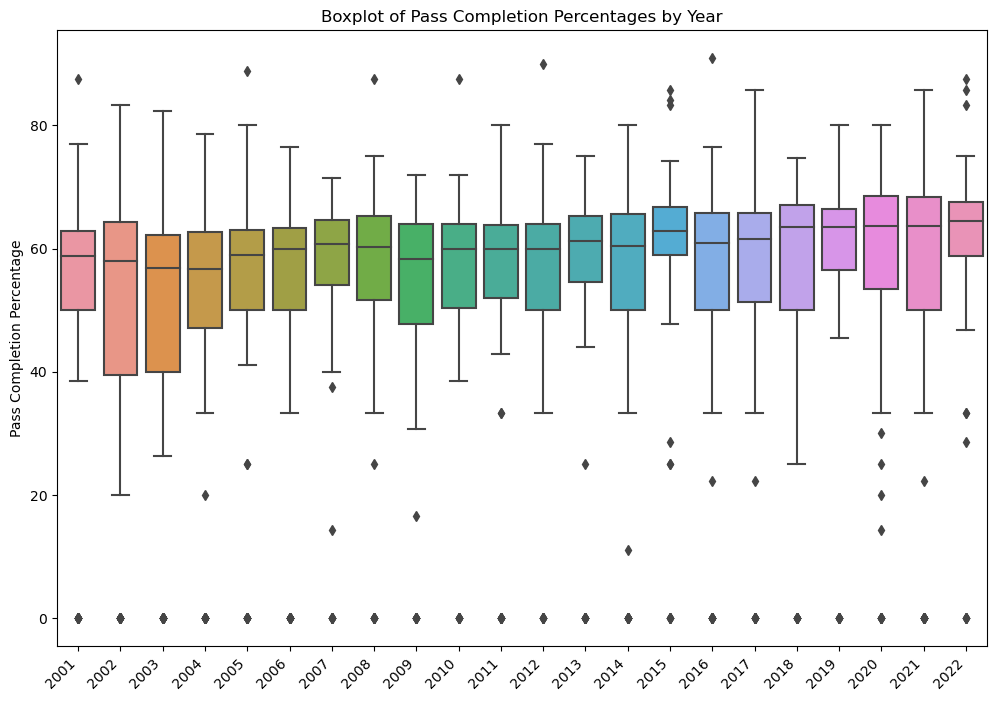

In [186]:
#Now we can see the pass_completion distributions by season using boxplots
data_to_plot = [pass_completion_percentages[f'pass_completion_percentage_{year}'] for year in range(2001, 2023)]

# Create a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_to_plot)
plt.xticks(ticks=range(22), labels=[str(year) for year in range(2001, 2023)], rotation=45, ha='right')
plt.title('Boxplot of Pass Completion Percentages by Year')
plt.ylabel('Pass Completion Percentage')
plt.show()

From the boxplot above, it seems to be that their is a slight increase within the interquartile range from 2001 to 2022. However, the range of pass completion percentages are quite close within the past two decades. 

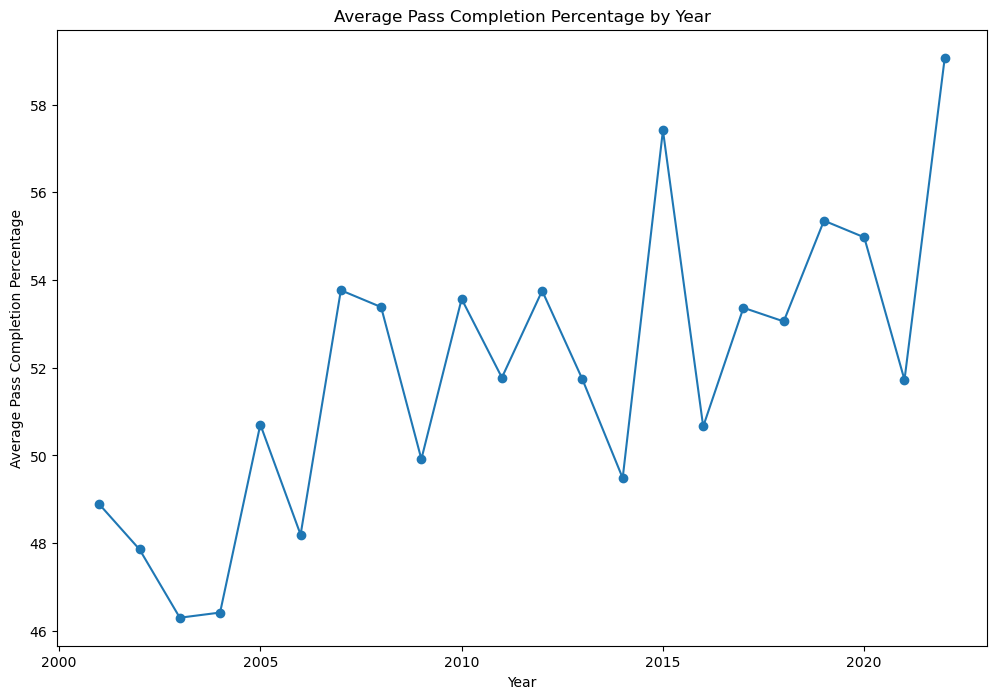

In [187]:
# Calculating the average pass completion percentage for each season
average_completion_percentage = [data.mean() for data in data_to_plot]

# Create a line plot
plt.figure(figsize=(12, 8))
plt.plot(range(2001, 2023), average_completion_percentage, marker='o')
plt.title('Average Pass Completion Percentage by Year')
plt.xlabel('Year')
plt.ylabel('Average Pass Completion Percentage')
plt.show()

This shows a more simpler visulization of average pass completion percentages per season by all quarterbacks. This shows how how much the average has increased for the past two decades. 

We can also check out a simple graph of the count of passing yards in the air:

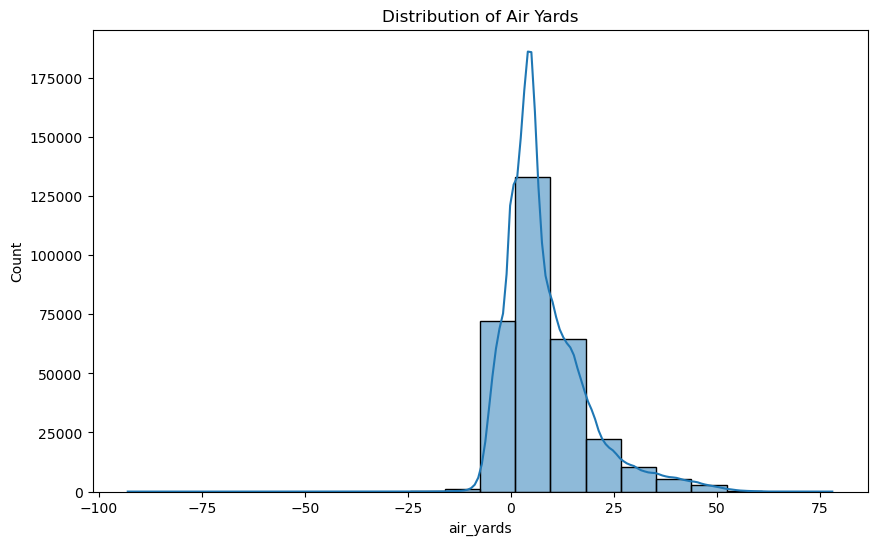

In [205]:
# Distribution plot for air yards
plt.figure(figsize=(10, 6))
sns.histplot(qb_data['air_yards'], bins=20, kde=True)
plt.title('Distribution of Air Yards')
plt.show()

Now lets check out a heatmap that indicates the correlations amongst the variables for passing yards:

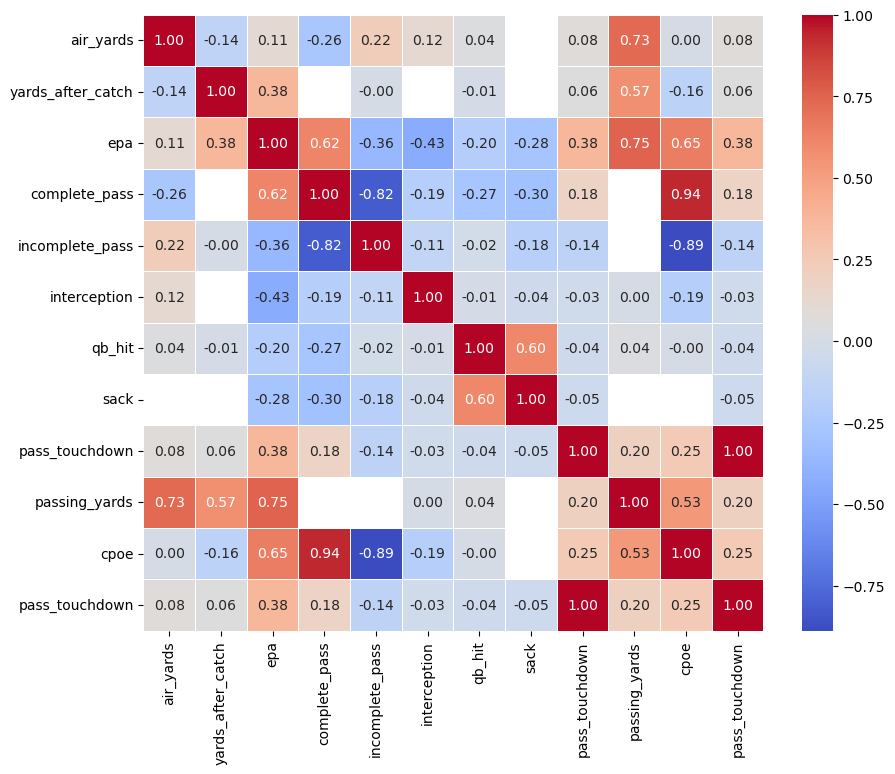

In [196]:
#Correlations amongst variables
selected_variables = ['air_yards', 'yards_after_catch', 'epa', 'complete_pass', 'incomplete_pass', 'interception', 'qb_hit', 'sack', 'pass_touchdown', 'passing_yards', 'cpoe']

selected_variables.append('pass_touchdown')

# Creating a correlation matrix
correlation_matrix = qb_data[selected_variables].corr()
plt.figure(figsize=(10, 8))

# Creating a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()

Correlation with complete passes and passing_yards

The more completed passes of course leads to more passing yards

Quarterbacks in the NFL tend to have more pass completions the more passing yards they showcase during a game

Now lets see correlations amongst the selected variables with pairplots and a scatterplot to show what variables correlates with another

<Figure size 1500x1000 with 0 Axes>

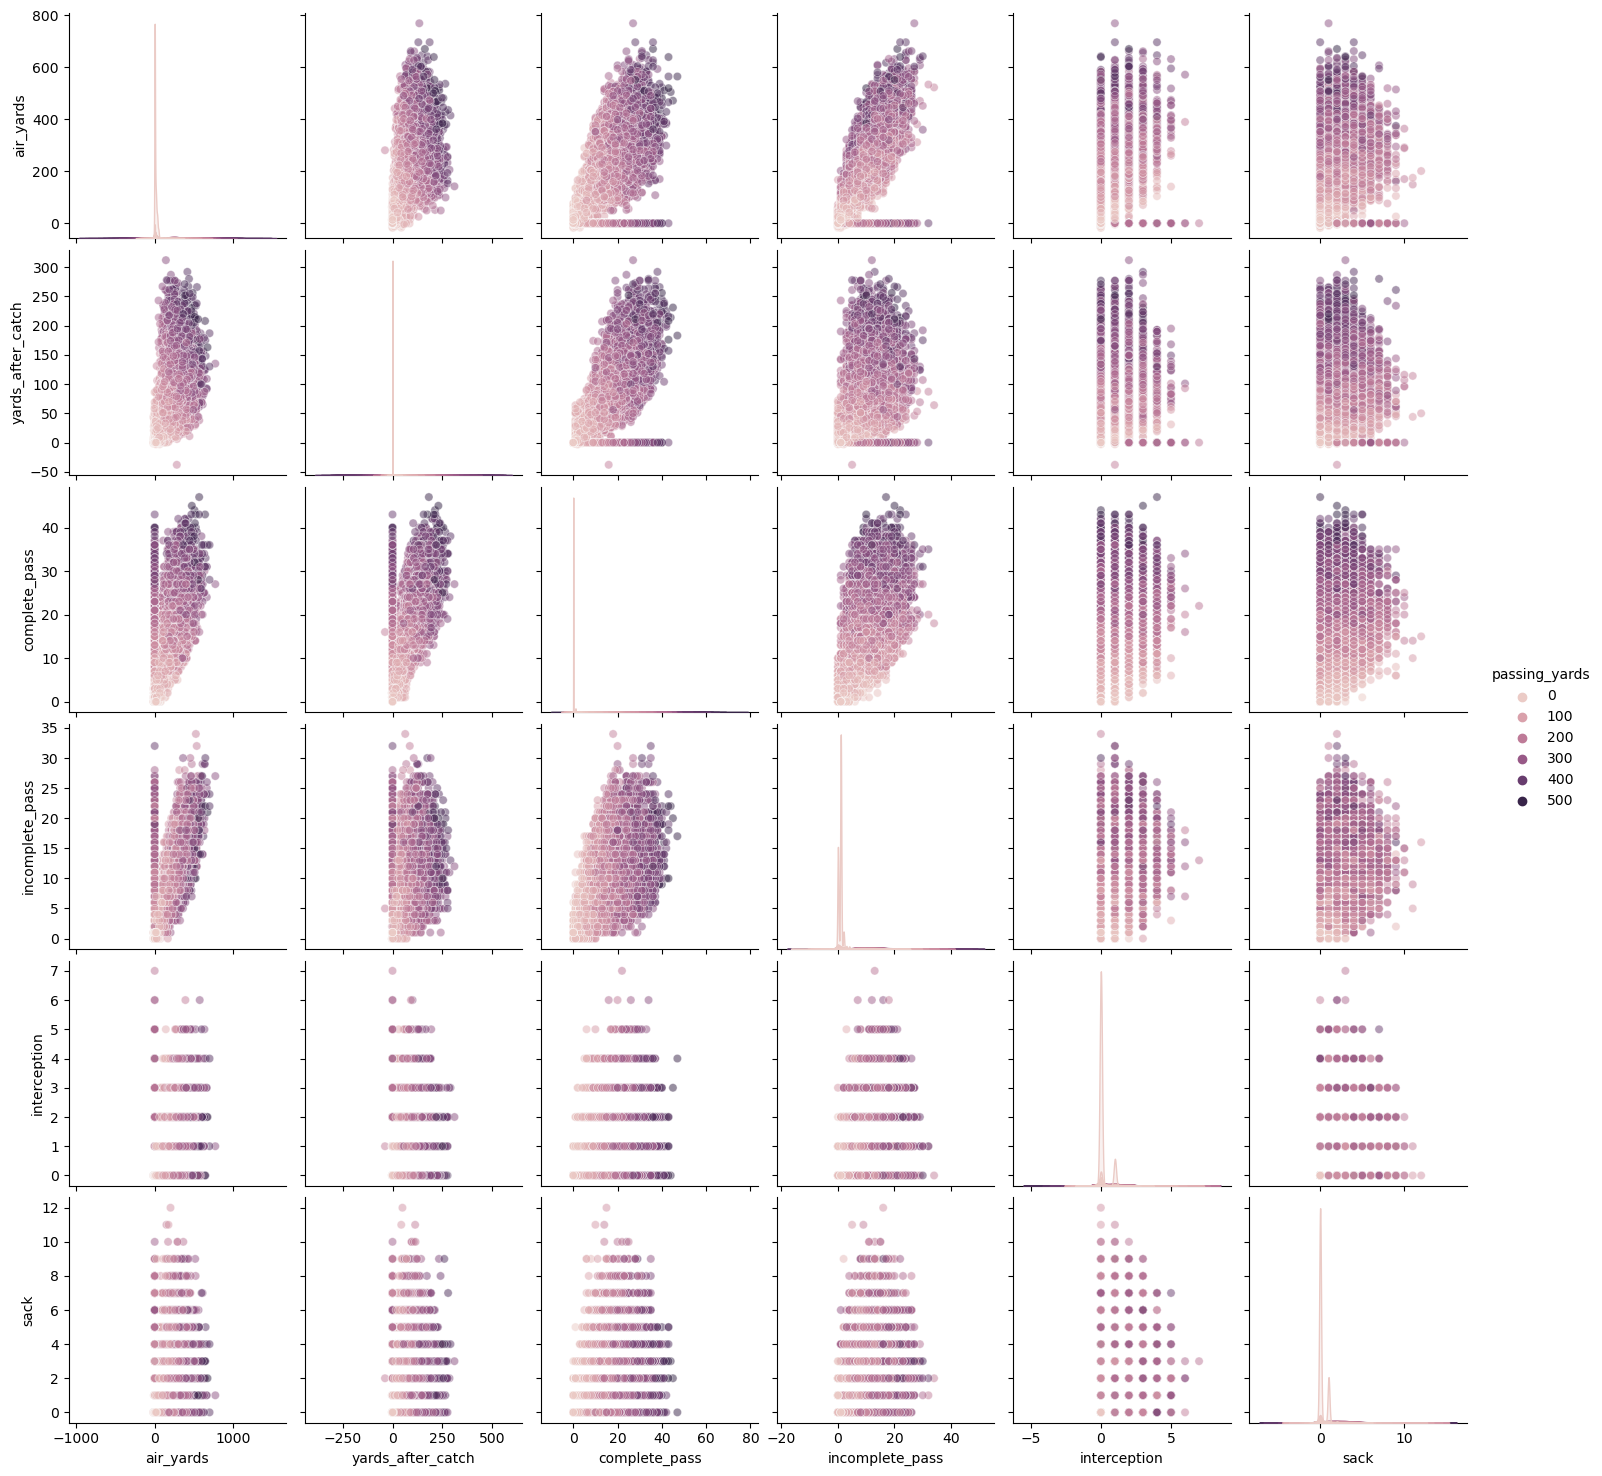

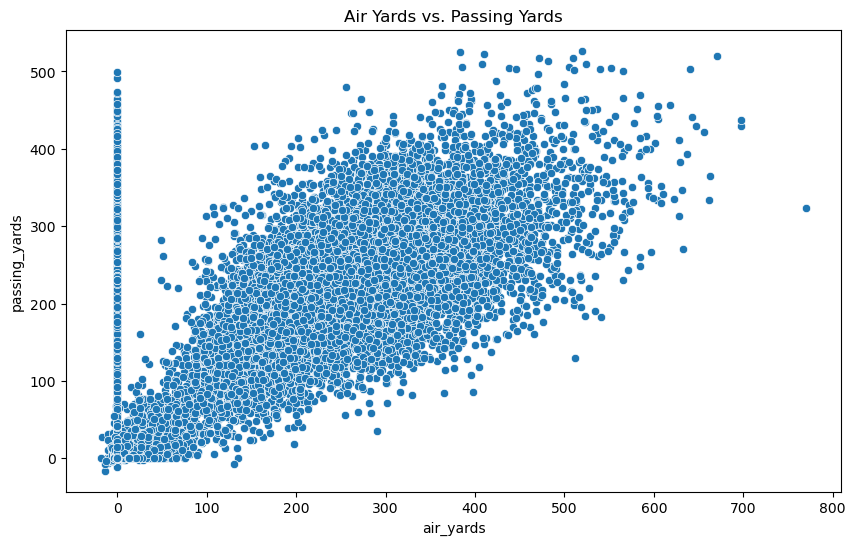

In [69]:
selected_variables = ['passer_player_name', 'air_yards', 'yards_after_catch', 'complete_pass', 'incomplete_pass', 'interception', 'sack', 'passing_yards']

# Pairplot with hue for passing yards
plt.figure(figsize=(15, 10))
sns.pairplot(qb_data[selected_variables], hue='passing_yards', plot_kws={'alpha':0.5})
plt.show()

# Scatter plot for air yards vs. passing yards
plt.figure(figsize=(10, 6))
sns.scatterplot(x='air_yards', y='passing_yards', data=qb_data)
plt.title('Air Yards vs. Passing Yards')
plt.show()

Now we will look at the correlation of numeric features against passing_yards.
We will define a function of scatterplots to find correlations with passing_yards.

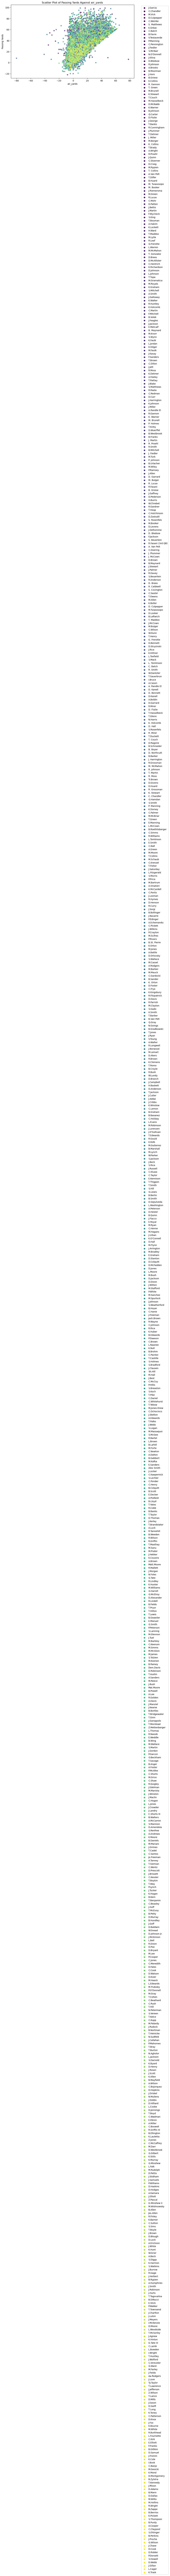

In [197]:
def scatterplot_passing_yards(df, x_column):
    """
    Create a scatter plot of passing_yards against the specified column.

    Parameters:
    - df: DataFrame containing the data
    - x_column: Name of the column to plot against passing_yards

    Returns:
    - None (displays the scatter plot)
    """
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x_column, y='passing_yards', data=df, hue='passer_player_name', palette='viridis', alpha=0.7)
    plt.title(f'Scatter Plot of Passing Yards Against {x_column}')
    plt.xlabel(x_column)
    plt.ylabel('Passing Yards')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Example usage:
scatterplot_passing_yards(qb_data, 'air_yards')

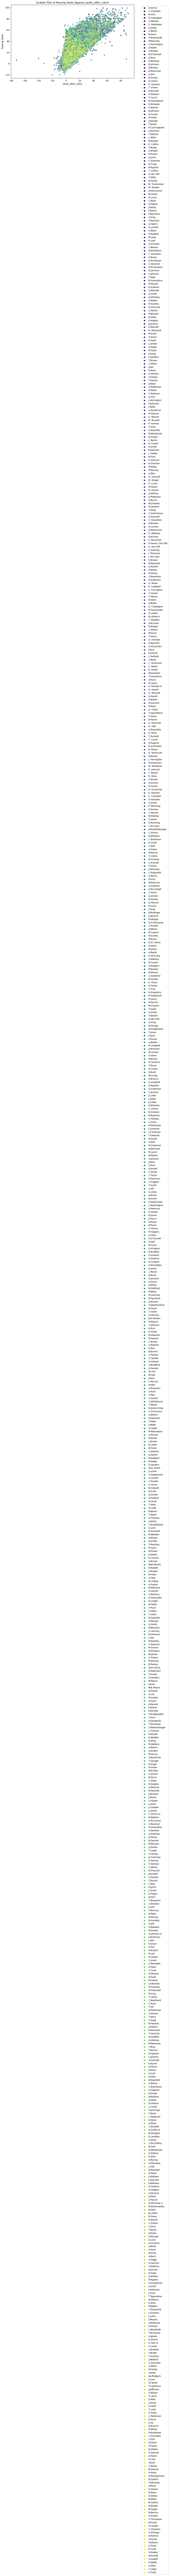

In [198]:
scatterplot_passing_yards(qb_data, 'yards_after_catch')

This visualization will show the passing yards per player with the top 5 highlighted in red 
The boxplot can show the average and minimum/maximum values:

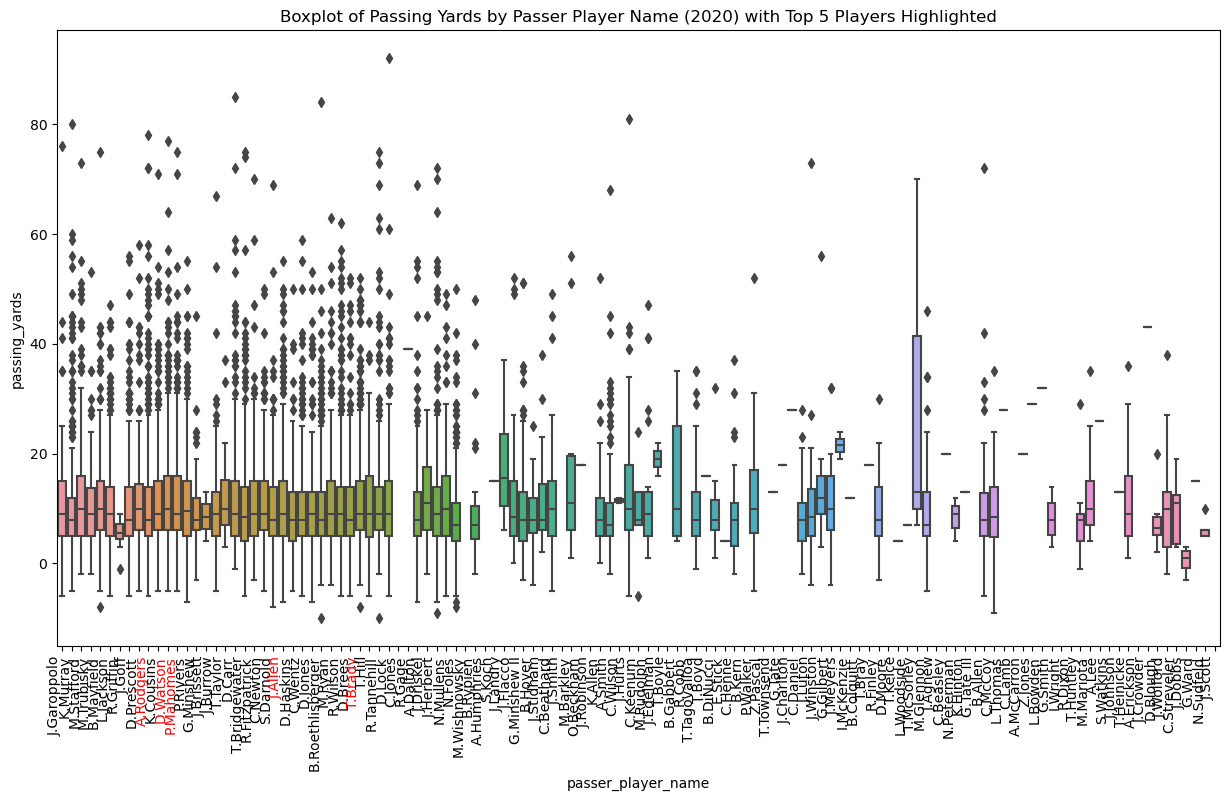

In [200]:
selected_season = 2020

# Filter the DataFrame for the specified season
filtered_data = qb_data[qb_data['season'] == selected_season]

# Get the top 5 players based on total passing yards
top_players = filtered_data.groupby('passer_player_name')['passing_yards'].sum().nlargest(5).index

# Boxplot for passing yards by passer_player_name with highlighted top 5 players
plt.figure(figsize=(15, 8))

# Create a boxplot and get the x-axis tick labels
box = sns.boxplot(x='passer_player_name', y='passing_yards', data=filtered_data)

# Highlight the top 5 players in red on the x-axis
for tick_label in box.get_xticklabels():
    if tick_label.get_text() in top_players:
        tick_label.set_color('red')

plt.xticks(rotation=90, ha='right')
plt.title(f'Boxplot of Passing Yards by Passer Player Name ({selected_season}) with Top 5 Players Highlighted')
plt.show()

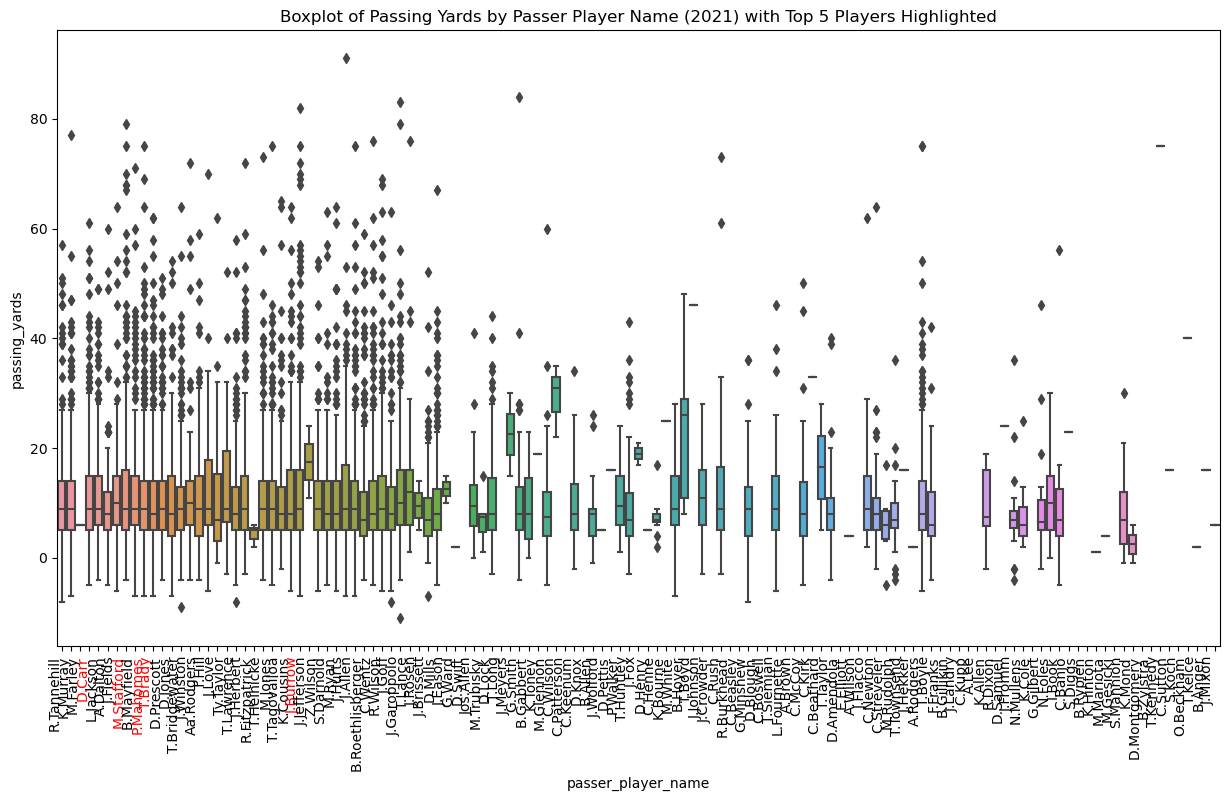

In [201]:
#This visualization will show the passing yards per player with the top 5 highlighted in red 
selected_season = 2021

# Filter the DataFrame for the specified season
filtered_data = qb_data[qb_data['season'] == selected_season]

# Get the top 5 players based on total passing yards
top_players = filtered_data.groupby('passer_player_name')['passing_yards'].sum().nlargest(5).index

# Boxplot for passing yards by passer_player_name with highlighted top 5 players
plt.figure(figsize=(15, 8))

# Create a boxplot and get the x-axis tick labels
box = sns.boxplot(x='passer_player_name', y='passing_yards', data=filtered_data)

# Highlight the top 5 players in red on the x-axis
for tick_label in box.get_xticklabels():
    if tick_label.get_text() in top_players:
        tick_label.set_color('red')

plt.xticks(rotation=90, ha='right')
plt.title(f'Boxplot of Passing Yards by Passer Player Name ({selected_season}) with Top 5 Players Highlighted')
plt.show()

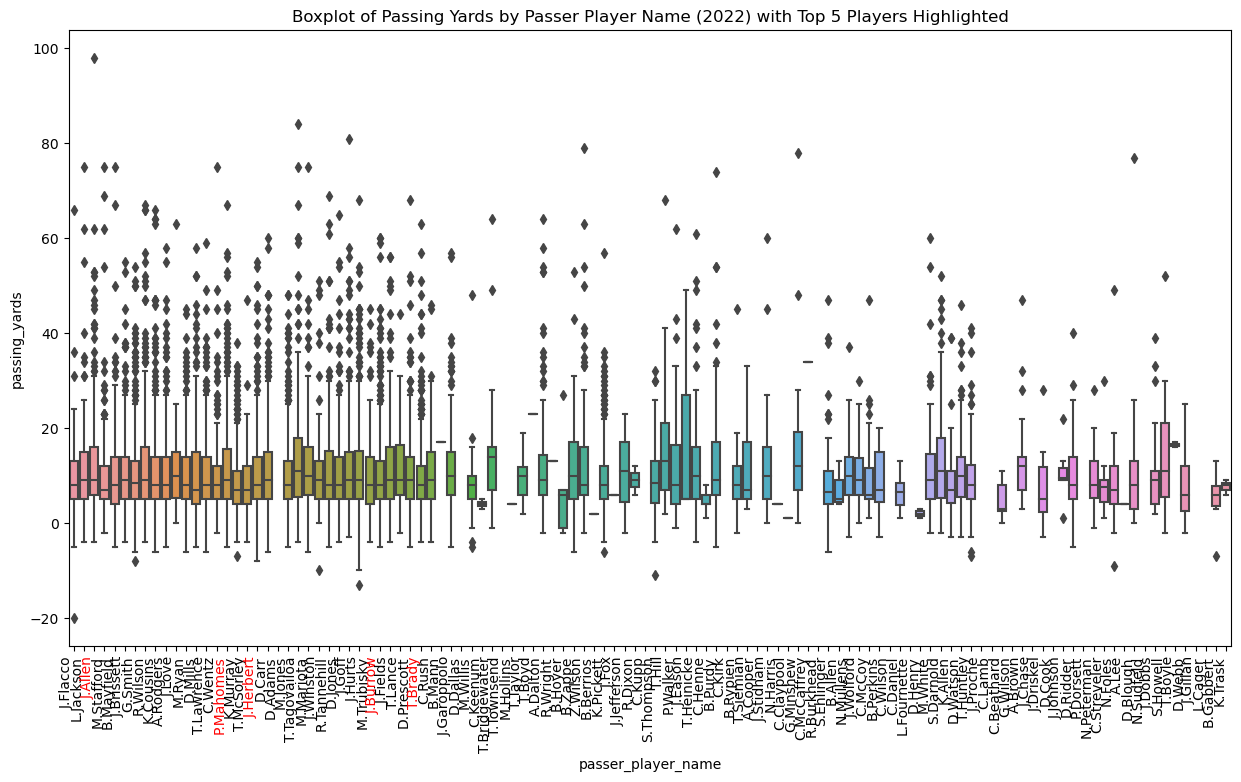

In [202]:
#This visualization will show the passing yards per player with the top 5 highlighted in red 
selected_season = 2022

# Filter the DataFrame for the specified season
filtered_data = qb_data[qb_data['season'] == selected_season]

# Get the top 5 players based on total passing yards
top_players = filtered_data.groupby('passer_player_name')['passing_yards'].sum().nlargest(5).index

# Boxplot for passing yards by passer_player_name with highlighted top 5 players
plt.figure(figsize=(15, 8))

# Create a boxplot and get the x-axis tick labels
box = sns.boxplot(x='passer_player_name', y='passing_yards', data=filtered_data)

# Highlight the top 5 players in red on the x-axis
for tick_label in box.get_xticklabels():
    if tick_label.get_text() in top_players:
        tick_label.set_color('red')

plt.xticks(rotation=90, ha='right')
plt.title(f'Boxplot of Passing Yards by Passer Player Name ({selected_season}) with Top 5 Players Highlighted')
plt.show()

Lets see a quick overview of passingyards done by player as weeks pass in a single season. Lets take a 
look at the 2022 season. This is important to know because we can see how quarterbacks do at the end of the season:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Passing Yards by week')

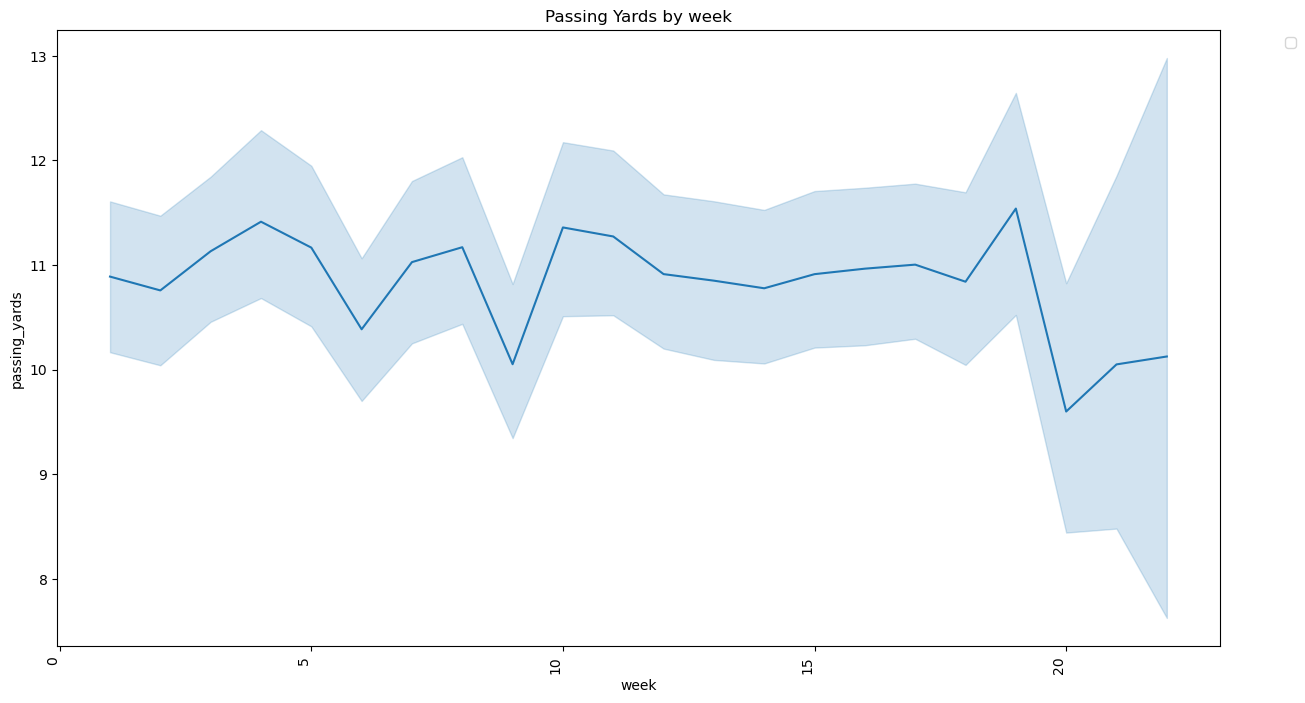

In [210]:
#This visualization will show the passing yards per player with the top 5 highlighted in red 
selected_season = 2022

# Filter the DataFrame for the specified season
filtered_data = qb_data[qb_data['season'] == selected_season]
plt.figure(figsize=(15, 8))
lineplot_season_passingyards = sns.lineplot(x='week', y='passing_yards', data=filtered_data)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90, ha='right')
plt.title('Passing Yards by week')

This is interesting to see because you may think that players will do better as the season progresses and it does at the 18th week, but it decreases because of the top teams that clinched their play offs don't play their 1st team for their last games. 

Performing a PCA analysi:
We will create a visualization that plots the cumulative explained variance ratio by the number of principal components to help determine how many components to retain.

In summary, this code performs dimensionality reduction using PCA on a subset of columns from the original DataFrame and visualizes the cumulative explained variance ratio.

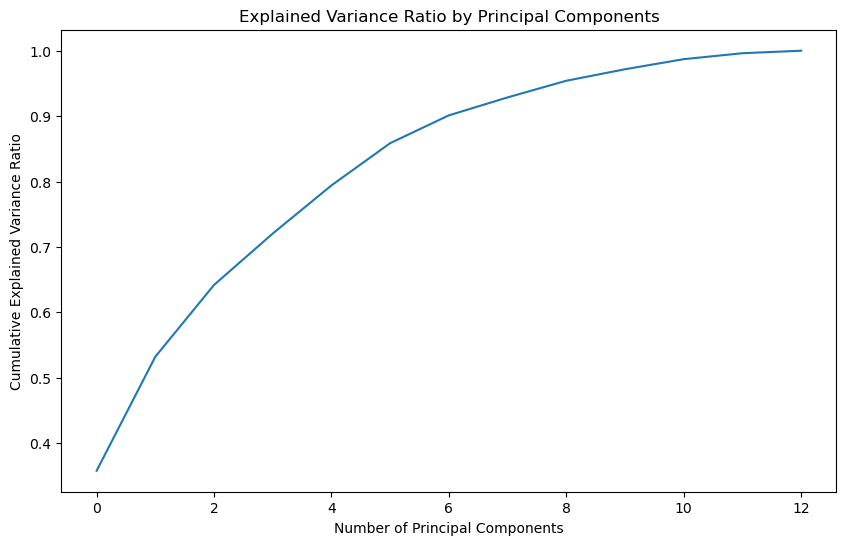

In [81]:
columns = ['passer_player_name', 'posteam', 'defteam', 'season', 'week', 'home_team', 'away_team', 'air_yards', 
           'yards_after_catch', 'epa', 'complete_pass', 'incomplete_pass', 'interception', 'qb_hit', 'sack', 'pass_touchdown',
           'passing_yards', 'cpoe', 'roof', 'surface']

# Extract relevant columns for analysis
qb_data_subset = qb_data[columns]

# Impute missing values
imputer = SimpleImputer(strategy='mean') 
qb_data_imputed = pd.DataFrame(imputer.fit_transform(qb_data_subset.select_dtypes(include=np.number)),
                                columns=qb_data_subset.select_dtypes(include=np.number).columns)

# Standardize numeric columns for PCA
numeric_columns = qb_data_imputed.select_dtypes(include=np.number).columns
scaler = StandardScaler()
qb_data_standardized = scaler.fit_transform(qb_data_imputed[numeric_columns])

# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(qb_data_standardized)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

# Feature Engineering/Additional Wrangling for the quarterback passer and Defense
Part 1 will be the passer data:

Will create some columns here: 'pass_completion' which is the percentage of quarterbacks pass completion

In [212]:
qb_data['pass_completion'] = qb_data['complete_pass'] / (qb_data['complete_pass'] + qb_data['incomplete_pass'])
qb_data['pass_completion'].head()

0    1.0
1    1.0
2    0.0
3    NaN
4    NaN
Name: pass_completion, dtype: float64

In [211]:
qb_data['pass_attempts'] = qb_data['complete_pass'] + qb_data['incomplete_pass']
qb_data['pass_attempts'].head()

0    1.0
1    1.0
2    1.0
3    0.0
4    0.0
Name: pass_attempts, dtype: float64

In [213]:
# Dropping the complete_pass and incomplete_pass columns
passer_df = qb_data.drop(columns=['complete_pass', 'incomplete_pass'])

Creating a new column that equals 1 if the passer is the home team and 0 if the passer is the away team

In [ ]:
passer_df['home_flag'] = passer_df['home_team'] == passer_df['posteam']

In [ ]:
passer_df = passer_df.drop(columns=['home_team', 'away_team'])

Reordering columns!

In [215]:
passer_df = passer_df[['passer_player_name', 'posteam', 'defteam', 'season', 'week', 'passing_yards', 'home_flag', 'pass_completion', 'pass_attempts',
                       'air_yards',  'yards_after_catch', 'epa', 'interception', 'qb_hit', 'sack', 'pass_touchdown', 
                        'cpoe', 'roof', 'surface']]

passer_df

passer_player_name posteam defteam  season  week  passing_yards  \
0                J.Garcia      SF     ATL    2001     1            6.0   
1                J.Garcia      SF     ATL    2001     1           26.0   
2                J.Garcia      SF     ATL    2001     1            NaN   
3                J.Garcia      SF     ATL    2001     1            NaN   
4              C.Chandler     ATL      SF    2001     1            NaN   
...                   ...     ...     ...     ...   ...            ...   
426922            J.Hurts     PHI      KC    2022    22           45.0   
426923          P.Mahomes      KC     PHI    2022    22           10.0   
426924          P.Mahomes      KC     PHI    2022    22            7.0   
426925          P.Mahomes      KC     PHI    2022    22            0.0   
426926            J.Hurts     PHI      KC    2022    22            NaN   

        home_flag  pass_completion  pass_attempts  air_yards  \
0            True              1.0            1.0        NaN   
1            True              1.0            1.0        NaN   
2            True              0.0            1.0        NaN   
3            True              NaN            0.0        NaN   
4           False              NaN            0.0        NaN   
...           ...              ...            ...        ...   
426922       True              1.0            1.0       41.0   
426923      False              1.0            1.0        6.0   
426924      False              1.0            1.0        4.0   
426925      False              1.0            1.0       -5.0   
426926       True              0.0            1.0       45.0   

        yards_after_catch       epa  interception  qb_hit  sack  \
0                     NaN  0.232765           0.0     0.0   0.0   
1                     NaN  2.373975           0.0     0.0   0.0   
2                     NaN -0.474315           0.0     0.0   0.0   
3                     NaN -2.309843           0.0     1.0   1.0   
4                     NaN -1.340032           0.0     1.0   1.0   
...                   ...       ...           ...     ...   ...   
426922                4.0  3.239489           0.0     0.0   0.0   
426923                4.0  1.280741           0.0     0.0   0.0   
426924                3.0  0.710100           0.0     0.0   0.0   
426925                5.0 -0.903265           0.0     0.0   0.0   
426926                NaN -0.070803           0.0     0.0   0.0   

        pass_touchdown       cpoe      roof surface  
0                  0.0        NaN  outdoors   grass  
1                  0.0        NaN  outdoors   grass  
2                  0.0        NaN  outdoors   grass  
3                  0.0        NaN  outdoors   grass  
4                  0.0        NaN  outdoors   grass  
...                ...        ...       ...     ...  
426922             0.0  68.481820    closed   grass  
426923             0.0  22.894585    closed   grass  
426924             0.0  20.355404    closed   grass  
426925             0.0  13.164168    closed   grass  
426926             0.0        NaN    closed   grass  

[426927 rows x 19 columns]

These lines of code calculates the exponentially weighted moving average (EWMA) for the team that is passing:

In [217]:
passer_df['completion_percentage_ewma'] = passer_df.groupby('passer_player_name')['pass_completion']\
    .transform(lambda x: x.ewm(min_periods=1, span=10).mean())

passer_df['pass_attempts_ewma'] = passer_df.groupby('passer_player_name')['pass_attempts']\
    .transform(lambda x: x.ewm(min_periods=1, span=10).mean())

passer_df['air_yards_ewma'] = passer_df.groupby('passer_player_name')['air_yards']\
    .transform(lambda x: x.ewm(min_periods=1, span=10).mean())

passer_df['yards_after_catch_ewma'] = passer_df.groupby('passer_player_name')['yards_after_catch']\
    .transform(lambda x: x.ewm(min_periods=1, span=10).mean())

passer_df['epa_ewma'] = passer_df.groupby('passer_player_name')['epa']\
    .transform(lambda x: x.ewm(min_periods=1, span=10).mean())

passer_df['interception_ewma'] = passer_df.groupby('passer_player_name')['interception']\
    .transform(lambda x: x.ewm(min_periods=1, span=10).mean())

passer_df['qb_hit_ewma'] = passer_df.groupby('passer_player_name')['qb_hit']\
    .transform(lambda x: x.ewm(min_periods=1, span=10).mean())

passer_df['sack_ewma'] = passer_df.groupby('passer_player_name')['sack']\
    .transform(lambda x: x.ewm(min_periods=1, span=10).mean())

passer_df['pass_touchdown_ewma'] = passer_df.groupby('passer_player_name')['pass_touchdown']\
    .transform(lambda x: x.ewm(min_periods=1, span=10).mean())

passer_df['passing_yards_ewma'] = passer_df.groupby('passer_player_name')['passing_yards']\
    .transform(lambda x: x.ewm(min_periods=1, span=10).mean())

passer_df['cpoe_ewma'] = passer_df.groupby('passer_player_name')['cpoe']\
    .transform(lambda x: x.ewm(min_periods=1, span=10).mean())

Make sure that the new columns have been added

In [218]:
passer_df.head()

passer_player_name posteam defteam  season  week  passing_yards  home_flag  \
0           J.Garcia      SF     ATL    2001     1            6.0       True   
1           J.Garcia      SF     ATL    2001     1           26.0       True   
2           J.Garcia      SF     ATL    2001     1            NaN       True   
3           J.Garcia      SF     ATL    2001     1            NaN       True   
4         C.Chandler     ATL      SF    2001     1            NaN      False   

   pass_completion  pass_attempts  air_yards  ...  pass_attempts_ewma  \
0              1.0            1.0        NaN  ...            1.000000   
1              1.0            1.0        NaN  ...            1.000000   
2              0.0            1.0        NaN  ...            1.000000   
3              NaN            0.0        NaN  ...            0.670545   
4              NaN            0.0        NaN  ...            0.000000   

   air_yards_ewma  yards_after_catch_ewma  epa_ewma  interception_ewma  \
0             NaN                     NaN  0.232765                0.0   
1             NaN                     NaN  1.410431                0.0   
2             NaN                     NaN  0.652776                0.0   
3             NaN                     NaN -0.323275                0.0   
4             NaN                     NaN -1.340032                0.0   

   qb_hit_ewma  sack_ewma pass_touchdown_ewma passing_yards_ewma  cpoe_ewma  
0     0.000000   0.000000                 0.0                6.0        NaN  
1     0.000000   0.000000                 0.0               17.0        NaN  
2     0.000000   0.000000                 0.0               17.0        NaN  
3     0.329455   0.329455                 0.0               17.0        NaN  
4     1.000000   1.000000                 0.0                NaN        NaN  

[5 rows x 30 columns]

We see that the columns have been added, but now we will drop the original columns

In [264]:
passer_df.shape

(426927, 20)

There are additional columns from the previous additions

In [ ]:
# Drop the non-ewma columns
passer_df_2= passer_df.drop(columns=['pass_completion', 'pass_attempts', 'air_yards', 'yards_after_catch', 'epa', 
                                    'interception', 'qb_hit', 'sack', 'pass_touchdown', 'cpoe'])

In [269]:
passer_df_2.head()

passer_player_name posteam defteam  season  week  passing_yards  home_flag  \
0       A. Randle El     PIT     DEN    2003     6            4.0      False   
1       A. Randle El     PIT      SF    2003    11           -7.0      False   
2        A. Van Pelt     BUF      KC    2003     8           12.0      False   
3        A. Van Pelt     BUF     NYJ    2002    12            5.0      False   
4          A.Andrews     TEN     NYJ    2015    14           41.0      False   

       roof    surface  completion_percentage_ewma  pass_attempts_ewma  \
0  outdoors      grass                         1.0                 1.0   
1  outdoors      grass                         1.0                 1.0   
2  outdoors      grass                         1.0                 2.0   
3  outdoors      grass                         1.0                 2.0   
4  outdoors  fieldturf                         1.0                 1.0   

   air_yards_ewma  yards_after_catch_ewma  epa_ewma  interception_ewma  \
0             0.0                     0.0 -0.114645                0.0   
1             0.0                     0.0 -0.997372                0.0   
2             0.0                     0.0 -5.139258                2.0   
3             0.0                     0.0 -2.421131                0.9   
4            26.0                    15.0  3.954364                0.0   

   qb_hit_ewma  sack_ewma  pass_touchdown_ewma  passing_yards_ewma  cpoe_ewma  
0          0.0        0.0                  0.0                4.00        NaN  
1          0.0        0.0                  0.0               -2.05        NaN  
2          0.0        0.0                  0.0               12.00        NaN  
3          0.0        0.0                  0.0                8.15        NaN  
4          0.0        0.0                  1.0               41.00  66.256546

In [270]:
passer_df_2.shape

(14473, 20)

Making sure that the columns are dropped

# Next step: Feature Engineering and Preprocessing for the Defense

In [233]:
# Select only the relevant columns
defense_df = ['defteam', 'season', 'week', 'home_team', 'away_team', 'play_type', 'air_yards',
                   'yards_after_catch', 'epa', 'complete_pass', 'incomplete_pass', 'interception', 'qb_hit', 'sack', 'pass_touchdown',
                   'passing_yards', 'cpoe', 'roof', 'surface']

defense_df = qb_data[defense_df]

In [234]:
defense_df.head()

defteam  season  week home_team away_team play_type  air_yards  \
0     ATL    2001     1        SF       ATL      pass        NaN   
1     ATL    2001     1        SF       ATL      pass        NaN   
2     ATL    2001     1        SF       ATL      pass        NaN   
3     ATL    2001     1        SF       ATL      pass        NaN   
4      SF    2001     1        SF       ATL      pass        NaN   

   yards_after_catch       epa  complete_pass  incomplete_pass  interception  \
0                NaN  0.232765            1.0              0.0           0.0   
1                NaN  2.373975            1.0              0.0           0.0   
2                NaN -0.474315            0.0              1.0           0.0   
3                NaN -2.309843            0.0              0.0           0.0   
4                NaN -1.340032            0.0              0.0           0.0   

   qb_hit  sack  pass_touchdown  passing_yards  cpoe      roof surface  
0     0.0   0.0             0.0            6.0   NaN  outdoors   grass  
1     0.0   0.0             0.0           26.0   NaN  outdoors   grass  
2     0.0   0.0             0.0            NaN   NaN  outdoors   grass  
3     1.0   1.0             0.0            NaN   NaN  outdoors   grass  
4     1.0   1.0             0.0            NaN   NaN  outdoors   grass

In [235]:
defense_df.dtypes

defteam               object
season                 int64
week                   int64
home_team             object
away_team             object
play_type             object
air_yards            float64
yards_after_catch    float64
epa                  float64
complete_pass        float64
incomplete_pass      float64
interception         float64
qb_hit               float64
sack                 float64
pass_touchdown       float64
passing_yards        float64
cpoe                 float64
roof                  object
surface               object
dtype: object

Here I will do the same with the passer_data by grouping the data by passer, weel, season and aggregate:

In [236]:
defense_df = defense_df.groupby(['defteam', 'week', 'season'], as_index=False).agg(
    {'home_team': 'first',
     'away_team': 'first',
     'air_yards': 'sum',
     'yards_after_catch': 'sum',
     'epa': 'sum',
     'complete_pass': 'sum',
     'incomplete_pass': 'sum',
     'interception': 'sum',
     'qb_hit': 'sum',
     'sack': 'sum',
     'pass_touchdown': 'sum',
     'passing_yards': 'sum',
     'cpoe': 'mean',
     'roof': 'first',
     'surface': 'first'
     }
)

Make sure that it was properly loaded:

In [237]:
defense_df.head()

defteam  week  season home_team away_team  air_yards  yards_after_catch  \
0     ARI     1    2002       WAS       ARI        0.0                0.0   
1     ARI     1    2003       DET       ARI        0.0                0.0   
2     ARI     1    2004        LA       ARI        0.0                0.0   
3     ARI     1    2005       NYG       ARI        0.0                0.0   
4     ARI     1    2006       ARI        SF      271.0              177.0   

        epa  complete_pass  incomplete_pass  interception  qb_hit  sack  \
0  7.278838           28.0             11.0           1.0     1.0   1.0   
1  9.668740           17.0             13.0           0.0     0.0   0.0   
2  5.298896           23.0             10.0           1.0     0.0   0.0   
3 -4.618278           10.0             11.0           2.0     0.0   3.0   
4  2.853351           23.0             15.0           0.0     6.0   1.0   

   pass_touchdown  passing_yards      cpoe      roof    surface  
0             3.0          327.0       NaN  outdoors      grass  
1             4.0          195.0       NaN      dome  fieldturf  
2             1.0          272.0       NaN      dome  astroturf  
3             2.0          172.0       NaN  outdoors  fieldturf  
4             1.0          288.0 -0.583447    closed      grass

In [238]:
# Creating a new column that is completion percentage
defense_df['completion_percentage'] = defense_df['complete_pass'] / (defense_df['complete_pass'] + defense_df['incomplete_pass'])

# Create a new column that is the number of pass attempts
defense_df['pass_attempts'] = defense_df['complete_pass'] + defense_df['incomplete_pass']

# Dropping the complete_pass and incomplete_pass columns
defense_df = defense_df.drop(columns=['complete_pass', 'incomplete_pass'])

In [239]:
# Create a new column that equals 1 if the defense is the home team and 0 if the defense is the away team
defense_df['home_flag'] = defense_df['home_team'] == defense_df['defteam']

# Drop the home_team and away_team columns
defense_df = defense_df.drop(columns=['home_team', 'away_team'])

Reordering Columns!

In [240]:
# Reorder the columns
defense_df = defense_df[['defteam', 'season', 'week', 'home_flag', 'passing_yards', 'completion_percentage', 'pass_attempts',
                       'air_yards',  'yards_after_catch', 'epa', 'interception', 'qb_hit', 'sack', 'pass_touchdown', 
                       'cpoe', 'roof', 'surface']]

defense_df

defteam  season  week  home_flag  passing_yards  completion_percentage  \
0         ARI    2002     1      False          327.0               0.717949   
1         ARI    2003     1      False          195.0               0.566667   
2         ARI    2004     1      False          272.0               0.696970   
3         ARI    2005     1      False          172.0               0.476190   
4         ARI    2006     1       True          288.0               0.605263   
...       ...     ...   ...        ...            ...                    ...   
11801     WAS    2015    18       True          210.0               0.583333   
11802     WAS    2020    18       True          381.0               0.550000   
11803     WAS    2021    18      False          103.0               0.517241   
11804     WAS    2022    18       True          128.0               0.378378   
11805     WAS    2005    19      False          215.0               0.615385   

       pass_attempts  air_yards  yards_after_catch        epa  interception  \
0               39.0        0.0                0.0   7.278838           1.0   
1               30.0        0.0                0.0   9.668740           0.0   
2               33.0        0.0                0.0   5.298896           1.0   
3               21.0        0.0                0.0  -4.618278           2.0   
4               38.0      271.0              177.0   2.853351           0.0   
...              ...        ...                ...        ...           ...   
11801           36.0      365.0               78.0  10.725159           0.0   
11802           40.0      461.0              119.0  19.551708           0.0   
11803           29.0      215.0               63.0 -19.281745           2.0   
11804           37.0      409.0               27.0 -14.503401           1.0   
11805           26.0        0.0                0.0   8.287029           0.0   

       qb_hit  sack  pass_touchdown       cpoe      roof    surface  
0         1.0   1.0             3.0        NaN  outdoors      grass  
1         0.0   0.0             4.0        NaN      dome  fieldturf  
2         0.0   0.0             1.0        NaN      dome  astroturf  
3         0.0   3.0             2.0        NaN  outdoors  fieldturf  
4         6.0   1.0             1.0  -0.583447    closed      grass  
...       ...   ...             ...        ...       ...        ...  
11801     2.0   1.0             2.0   1.810942  outdoors      grass  
11802     7.0   3.0             2.0  -2.638113  outdoors      grass  
11803     8.0   3.0             1.0 -16.412040  outdoors  fieldturf  
11804     4.0   1.0             1.0 -24.035632  outdoors      grass  
11805     0.0   0.0             1.0        NaN  outdoors  fieldturf  

[11806 rows x 17 columns]

Same as the passer_data, we will calculate the exponentially weighted moving average for each feature:

In [241]:
# Calculate the exponentially weighted moving average for each feature
defense_df['completion_percentage_ewma'] = defense_df.groupby('defteam')['completion_percentage']\
    .transform(lambda x: x.ewm(min_periods=1, span=10).mean())

defense_df['pass_attempts_ewma'] = defense_df.groupby('defteam')['pass_attempts']\
    .transform(lambda x: x.ewm(min_periods=1, span=10).mean())

defense_df['air_yards_ewma'] = defense_df.groupby('defteam')['air_yards']\
    .transform(lambda x: x.ewm(min_periods=1, span=10).mean())

defense_df['yards_after_catch_ewma'] = defense_df.groupby('defteam')['yards_after_catch']\
    .transform(lambda x: x.ewm(min_periods=1, span=10).mean())

defense_df['epa_ewma'] = defense_df.groupby('defteam')['epa']\
    .transform(lambda x: x.ewm(min_periods=1, span=10).mean())

defense_df['interception_ewma'] = defense_df.groupby('defteam')['interception']\
    .transform(lambda x: x.ewm(min_periods=1, span=10).mean())

defense_df['qb_hit_ewma'] = defense_df.groupby('defteam')['qb_hit']\
    .transform(lambda x: x.ewm(min_periods=1, span=10).mean())

defense_df['sack_ewma'] = defense_df.groupby('defteam')['sack']\
    .transform(lambda x: x.ewm(min_periods=1, span=10).mean())

defense_df['pass_touchdown_ewma'] = defense_df.groupby('defteam')['pass_touchdown']\
    .transform(lambda x: x.ewm(min_periods=1, span=10).mean())

defense_df['passing_yards_ewma'] = defense_df.groupby('defteam')['passing_yards']\
    .transform(lambda x: x.ewm(min_periods=1, span=10).mean())

defense_df['cpoe_ewma'] = defense_df.groupby('defteam')['cpoe']\
    .transform(lambda x: x.ewm(min_periods=1, span=10).mean())

In [243]:
defense_df.shape

(11806, 28)

Dropping again the unused columns:

In [244]:
# Dropping the non-ewma columns
defense_df = defense_df.drop(columns=['passing_yards','completion_percentage', 'pass_attempts', 'air_yards', 'yards_after_catch', 'epa', 
                                    'interception', 'qb_hit', 'sack', 'pass_touchdown', 'cpoe'])

In [245]:
defense_df.head()

defteam  season  week  home_flag      roof    surface  \
0     ARI    2002     1      False  outdoors      grass   
1     ARI    2003     1      False      dome  fieldturf   
2     ARI    2004     1      False      dome  astroturf   
3     ARI    2005     1      False  outdoors  fieldturf   
4     ARI    2006     1       True    closed      grass   

   completion_percentage_ewma  pass_attempts_ewma  air_yards_ewma  \
0                    0.717949           39.000000        0.000000   
1                    0.634744           34.050000        0.000000   
2                    0.659758           33.627907        0.000000   
3                    0.599281           29.467574        0.000000   
4                    0.600998           31.917002       77.796729   

   yards_after_catch_ewma  epa_ewma  interception_ewma  qb_hit_ewma  \
0                0.000000  7.278838           1.000000     1.000000   
1                0.000000  8.593284           0.450000     0.450000   
2                0.000000  7.268962           0.671096     0.269103   
3                0.000000  3.352646           1.108911     0.180446   
4               50.811886  3.209312           0.790573     1.851081   

   sack_ewma  pass_touchdown_ewma  passing_yards_ewma  cpoe_ewma  
0   1.000000             3.000000          327.000000        NaN  
1   0.450000             3.550000          254.400000        NaN  
2   0.269103             2.524917          261.475083        NaN  
3   1.168812             2.351980          231.997030        NaN  
4   1.120351             1.963863          248.073959  -0.583447

# Merging Passer_df data and the defense_df data:

In [271]:
# Merge the defense and passer dataframes together
df_both_sides = passer_df_2.merge(defense_df, how='inner', on=['defteam', 'season', 'week', 'roof', 'surface'], suffixes=('_passer', '_defense'))

df_both_sides

passer_player_name posteam defteam  season  week  passing_yards  \
0           A. Randle El     PIT     DEN    2003     6            4.0   
1              T. Maddox     PIT     DEN    2003     6          182.0   
2           A. Randle El     PIT      SF    2003    11           -7.0   
3              T. Maddox     PIT      SF    2003    11          327.0   
4            A. Van Pelt     BUF      KC    2003     8           12.0   
...                  ...     ...     ...     ...   ...            ...   
14468           Z.Wilson     NYJ     PHI    2021    13          226.0   
14469           Z.Wilson     NYJ      NO    2021    14          202.0   
14470           Z.Wilson     NYJ     DET    2022    15          317.0   
14471           Z.Wilson     NYJ     JAX    2021    16          102.0   
14472           Z.Wilson     NYJ      TB    2021    17          234.0   

       home_flag_passer      roof    surface  \
0                 False  outdoors      grass   
1                 False  outdoors      grass   
2                 False  outdoors      grass   
3                 False  outdoors      grass   
4                 False  outdoors      grass   
...                 ...       ...        ...   
14468              True  outdoors  fieldturf   
14469              True  outdoors  fieldturf   
14470              True  outdoors  fieldturf   
14471              True  outdoors  fieldturf   
14472              True  outdoors  fieldturf   

       completion_percentage_ewma_passer  ...  pass_attempts_ewma_defense  \
0                               1.000000  ...                   31.344590   
1                               0.613559  ...                   31.344590   
2                               1.000000  ...                   40.069406   
3                               0.568457  ...                   40.069406   
4                               1.000000  ...                   38.665695   
...                                  ...  ...                         ...   
14468                           0.588066  ...                   33.887932   
14469                           0.562359  ...                   33.442542   
14470                           0.556639  ...                   36.416368   
14471                           0.571462  ...                   31.491889   
14472                           0.565906  ...                   36.809712   

       air_yards_ewma_defense  yards_after_catch_ewma_defense  \
0                  129.724628                       67.981687   
1                  129.724628                       67.981687   
2                  142.949049                       58.386954   
3                  142.949049                       58.386954   
4                  164.910896                       68.246006   
...                       ...                             ...   
14468              301.328623                      113.584668   
14469              279.117536                      107.020107   
14470              344.191879                      116.493281   
14471              252.600666                       97.815095   
14472              269.893722                      124.657905   

       epa_ewma_defense  interception_ewma_defense  qb_hit_ewma_defense  \
0             -0.956255                   0.773298             4.259832   
1             -0.956255                   0.773298             4.259832   
2             -1.431544                   1.352598             3.429567   
3             -1.431544                   1.352598             3.429567   
4             -5.256063                   1.873364             3.126455   
...                 ...                        ...                  ...   
14468          5.040024                   0.834598             6.194539   
14469         -0.408311                   0.667210             4.863678   
14470          4.722480                   0.786088             4.665049   
14471          5.287182                   0.877770             4.802078   
14472          5.4101

In [272]:
df_both_sides.columns

Index(['passer_player_name', 'posteam', 'defteam', 'season', 'week',
       'passing_yards', 'home_flag_passer', 'roof', 'surface',
       'completion_percentage_ewma_passer', 'pass_attempts_ewma_passer',
       'air_yards_ewma_passer', 'yards_after_catch_ewma_passer',
       'epa_ewma_passer', 'interception_ewma_passer', 'qb_hit_ewma_passer',
       'sack_ewma_passer', 'pass_touchdown_ewma_passer',
       'passing_yards_ewma_passer', 'cpoe_ewma_passer', 'home_flag_defense',
       'completion_percentage_ewma_defense', 'pass_attempts_ewma_defense',
       'air_yards_ewma_defense', 'yards_after_catch_ewma_defense',
       'epa_ewma_defense', 'interception_ewma_defense', 'qb_hit_ewma_defense',
       'sack_ewma_defense', 'pass_touchdown_ewma_defense',
       'passing_yards_ewma_defense', 'cpoe_ewma_defense'],
      dtype='object')

In [273]:
df_both_sides.shape

(14473, 32)

# Removing some Outliers:
The problem with the NFL is that there are some terrible days for quarterbacks where they get injured and play the first 3 minutes or where they throw 2 interceptions out of their first 5 throws. This creates a situation where they will get benched. These are just two reasons of why a quarterback may have less than 5 throw attempts per match, but we will take those out as outliers:

In [274]:
df_both_sides = df_both_sides[df_both_sides['pass_attempts_ewma_passer'] > 5]

In [275]:
df_both_sides

passer_player_name posteam defteam  season  week  passing_yards  \
1              T. Maddox     PIT     DEN    2003     6          182.0   
3              T. Maddox     PIT      SF    2003    11          327.0   
5             D. Bledsoe     BUF      KC    2003     8          153.0   
7             D. Bledsoe     BUF     NYJ    2002    12          181.0   
9              M.Mariota     TEN     NYJ    2015    14          274.0   
...                  ...     ...     ...     ...   ...            ...   
14468           Z.Wilson     NYJ     PHI    2021    13          226.0   
14469           Z.Wilson     NYJ      NO    2021    14          202.0   
14470           Z.Wilson     NYJ     DET    2022    15          317.0   
14471           Z.Wilson     NYJ     JAX    2021    16          102.0   
14472           Z.Wilson     NYJ      TB    2021    17          234.0   

       home_flag_passer      roof    surface  \
1                 False  outdoors      grass   
3                 False  outdoors      grass   
5                 False  outdoors      grass   
7                 False  outdoors      grass   
9                 False  outdoors  fieldturf   
...                 ...       ...        ...   
14468              True  outdoors  fieldturf   
14469              True  outdoors  fieldturf   
14470              True  outdoors  fieldturf   
14471              True  outdoors  fieldturf   
14472              True  outdoors  fieldturf   

       completion_percentage_ewma_passer  ...  pass_attempts_ewma_defense  \
1                               0.613559  ...                   31.344590   
3                               0.568457  ...                   40.069406   
5                               0.741935  ...                   38.665695   
7                               0.652168  ...                   32.756821   
9                               0.637856  ...                   31.366498   
...                                  ...  ...                         ...   
14468                           0.588066  ...                   33.887932   
14469                           0.562359  ...                   33.442542   
14470                           0.556639  ...                   36.416368   
14471                           0.571462  ...                   31.491889   
14472                           0.565906  ...                   36.809712   

       air_yards_ewma_defense  yards_after_catch_ewma_defense  \
1                  129.724628                       67.981687   
3                  142.949049                       58.386954   
5                  164.910896                       68.246006   
7                  165.142799                       79.172072   
9                  282.321071                       93.996849   
...                       ...                             ...   
14468              301.328623                      113.584668   
14469              279.117536                      107.020107   
14470              344.191879                      116.493281   
14471              252.600666                       97.815095   
14472              269.893722                      124.657905   

       epa_ewma_defense  interception_ewma_defense  qb_hit_ewma_defense  \
1             -0.956255                   0.773298             4.259832   
3             -1.431544                   1.352598             3.429567   
5             -5.256063                   1.873364             3.126455   
7              1.965938                   0.595941             3.690434   
9             -2.162989                   1.151373             5.484436   
...                 ...                        ...                  ...   
14468          5.040024                   0.834598             6.194539   
14469         -0.408311                   0.667210             4.863678   
14470          4.722480                   0.786088             4.665049   
14471          5.287182                   0.877770             4.802078   
14472          5.4101

# Summary Statistics:

In [276]:
# Getting an overview of the data
df_both_sides.describe().round(2)

season      week  passing_yards  completion_percentage_ewma_passer  \
count  13334.00  13334.00       13334.00                           13334.00   
mean    2011.52      9.65         210.33                               0.63   
std        6.37      5.30          97.26                               0.06   
min     2001.00      1.00          -7.00                               0.12   
25%     2006.00      5.00         152.00                               0.60   
50%     2011.00     10.00         217.00                               0.64   
75%     2017.00     14.00         276.00                               0.67   
max     2022.00     22.00         527.00                               1.00   

       pass_attempts_ewma_passer  air_yards_ewma_passer  \
count                   13334.00               13334.00   
mean                       29.02                 192.16   
std                         6.69                 100.13   
min                         5.06                   0.00   
25%                        25.48                 123.20   
50%                        30.12                 216.61   
75%                        33.67                 269.92   
max                        53.00                 567.00   

       yards_after_catch_ewma_passer  epa_ewma_passer  \
count                       13334.00         13334.00   
mean                           74.37             0.52   
std                            41.66             4.83   
min                             0.00           -29.73   
25%                            42.77            -2.52   
50%                            81.64             0.36   
75%                           105.81             3.67   
max                           207.70            27.84   

       interception_ewma_passer  qb_hit_ewma_passer  ...  \
count                  13334.00            13334.00  ...   
mean                       0.81                3.64  ...   
std                        0.40                1.67  ...   
min                        0.00                0.00  ...   
25%                        0.55                2.41  ...   
50%                        0.77                3.58  ...   
75%                        1.02                4.77  ...   
max                        7.00               17.00  ...   

       pass_attempts_ewma_defense  air_yards_ewma_defense  \
count                    13334.00                13334.00   
mean                        32.78                  216.41   
std                          2.79                   65.91   
min                         16.00                    0.00   
25%                         30.90                  169.76   
50%                         32.76                  226.46   
75%                         34.58                  265.52   
max                         47.00                  385.46   

       yards_after_catch_ewma_defense  epa_ewma_defense  \
count                        13334.00          13334.00   
mean                            83.45              0.39   
std                             26.46              3.82   
min                              0.00            -16.90   
25%                             64.13             -2.17   
50%                             85.93              0.41   
75%                            102.35              2.96   
max                            166.36             18.57   

       interception_ewma_defense  qb_hit_ewma_defense  sack_ewma_defense  \
count                   13334.00             13334.00           13334.00   
mean                        0.94                 4.12               2.30   
std                         0.34                 1.14               0.58   
min                         0.00                 0.00               0.00   
25%                         0.69                 3.30               1.90   
50%                         0.90                 4.07               2.25   
75%                         1.14                 4.89               2.67   
max                 

# Heat Map using Merged Data:

/var/folders/2r/qvwb_49162s3q75v3pr4d1x00000gn/T/ipykernel_1253/741903708.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset_corr = df_both_sides.corr()


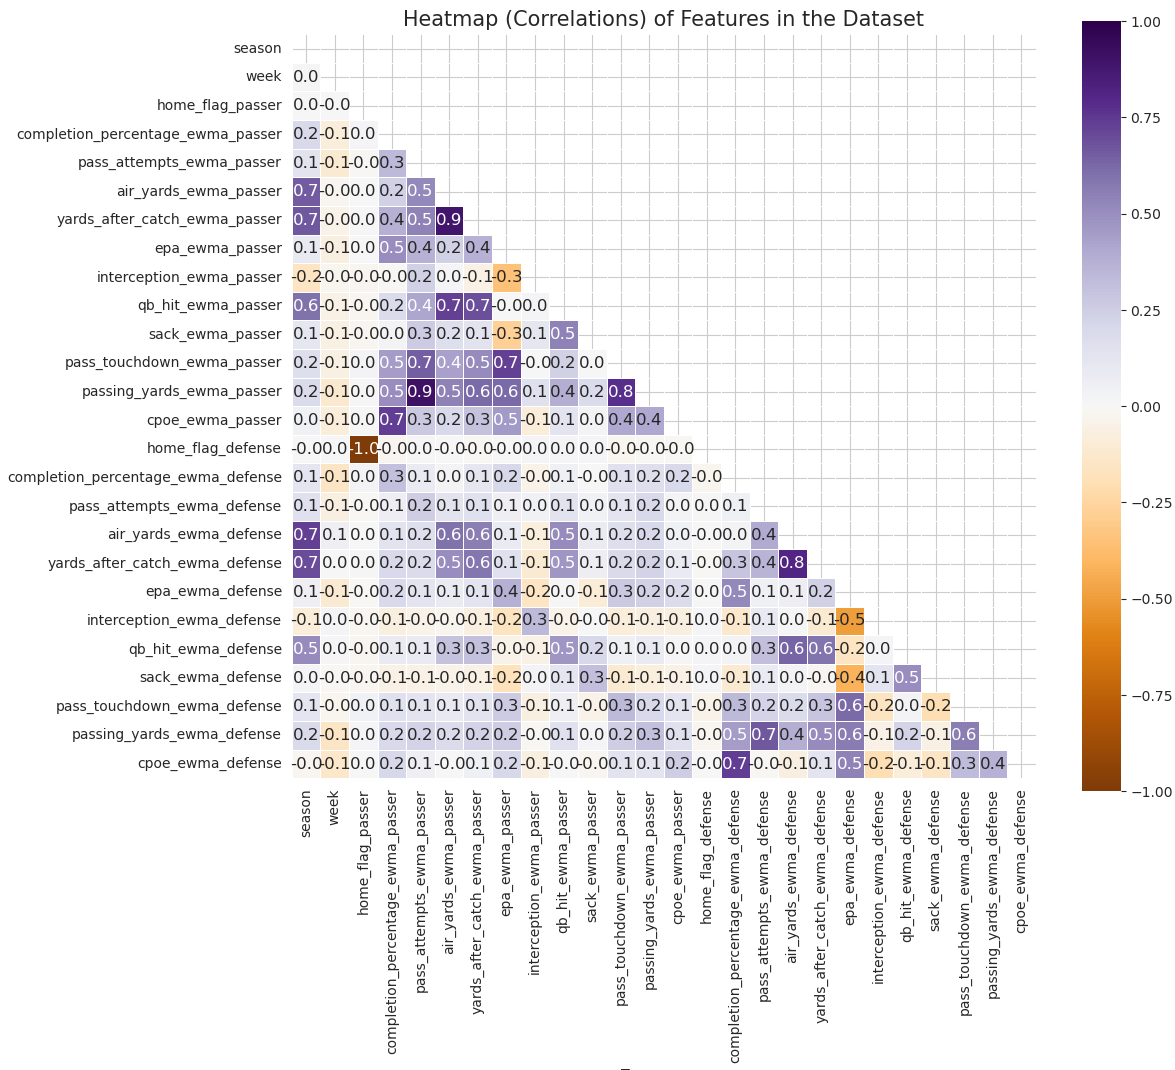

In [283]:
#Creating a correlation for the dataset.
dataset_corr = df_both_sides.corr()

dataset_corr = dataset_corr.drop(['passing_yards'], axis=1)
dataset_corr = dataset_corr.drop(['passing_yards'], axis=0)

# Creating a correlation matrix. Only bottom left corner valued.
mask = np.zeros_like(dataset_corr.round(4))
mask[np.triu_indices_from(mask)] = True

# Generate the corrleation matrix (heatmap) using Seaborn.
with sns.axes_style("whitegrid"):
    f, ax = plt.subplots(figsize=(12, 10))
    ax = sns.heatmap(dataset_corr.round(2), mask=mask, vmax=1, center=0, vmin=-1, square=True,
                     cmap='PuOr', linewidths=.5, annot=True, annot_kws={"size": 12}, fmt='.1f')
    plt.title('Heatmap (Correlations) of Features from the Dataset', fontsize=15)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Features', fontsize=15)
plt.show()

Looking at this heatmap, some examples we can see is that the interception passed by the thrower is negatively correlated with the epa of the passer. Makes sense, because the less interceptions in a match by a quarterback, the more expected points the offesive team will have. 

On the opposite end, the dark purple areas indicate positive correlations. An example for a highly positive correlated variables would be the more attempts the passer makes, it usually leads to more passing yards. Quarterbacks that make a multitude of attempts and still have a low pass completion rate can get benched or the coach will completely change the teams tactics, so some interesting thoughts to process here. 


Overall, I had a dataset with 21 columns and roughly 426,000 rows of data from the year 2001 to the 2022 season. Thats been used to see some visualizaions of percentages of pass completions, quarterback stats, the total count of throws per year and so forth. The process then went to more wrangling by creating a passer dataframe and a defense dataframe. Outliers were dropped and the exponentially weighted moving average for both dataframes were calculated in as the data is involving a statistical measure of time. The merged dataframe now has roughly 13,000 rows with 32 columns of variables. 